### **Qubits and Bloch Sphere Representation**

A **qubit** is the basic unit of quantum information, analogous to a classical bit, but with richer structure. While a classical bit can only be 0 or 1, a qubit can be in a superposition:  

$$ 
|ψ⟩ = α|0⟩ + β|1⟩, \quad \text{with } |α|^2 + |β|^2 = 1 
$$  

This means the state of a qubit is a normalized vector in a 2-dimensional Hilbert space. However, not all the degrees of freedom are physically distinct: a global phase does not affect measurement. As a result, every single-qubit state can be uniquely mapped to a point on the **Bloch sphere**, a unit sphere in 3D space.

A qubit on the Bloch sphere is written as:  

$$ 
|ψ⟩ = \cos\left(\frac{θ}{2}\right)|0⟩ + e^{iφ}\sin\left(\frac{θ}{2}\right)|1⟩ 
$$  

Here θ ∈ [0,π] is the **polar angle**, and φ ∈ [0,2π) is the **azimuthal angle**. This representation is powerful:  
- **North pole (θ=0)** → |0⟩  
- **South pole (θ=π)** → |1⟩  
- **Equator** → equal superpositions like |+⟩ = (|0⟩+|1⟩)/√2.  
- Quantum gates act as rotations of this vector on the Bloch sphere.  

Thus, the Bloch sphere gives a complete geometric visualization of all possible pure qubit states.


In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

### **Basic States on the Bloch Sphere**

Let us visualize the computational basis states |0⟩ and |1⟩, and then the superposition states |+⟩ and |−⟩. These form the standard directions on the Bloch sphere: |0⟩ is the north pole, |1⟩ the south pole, and |±⟩ lie along the x-axis equator.


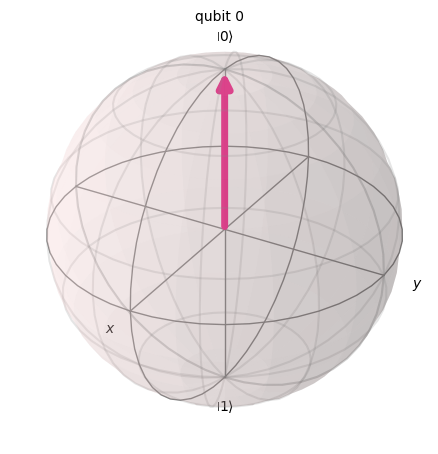

In [2]:
# |0⟩ state
qc0 = QuantumCircuit(1)
state0 = Statevector.from_instruction(qc0)
plot_bloch_multivector(state0)

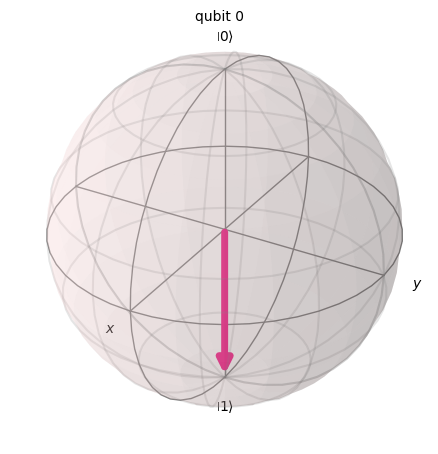

In [3]:
# |1⟩ state
qc1 = QuantumCircuit(1)
qc1.x(0)
state1 = Statevector.from_instruction(qc1)
plot_bloch_multivector(state1)

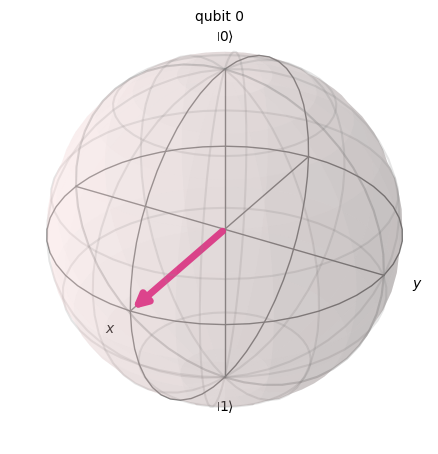

In [4]:
# |+⟩ state
qc_plus = QuantumCircuit(1)
qc_plus.h(0)
state_plus = Statevector.from_instruction(qc_plus)
plot_bloch_multivector(state_plus)

In [5]:
# |−⟩ state
qc_minus = QuantumCircuit(1)
qc_minus.x(0)
qc_minus.h(0)
state_minus = Statevector.from_instruction(qc_minus)
plot_bloch_multivector(state_minus)

### **Arbitrary Qubit States**

Now let us prepare an arbitrary qubit state using Qiskit’s `initialize` function. For example:

$$ |ψ⟩ = \cos(\tfrac{θ}{2})|0⟩ + e^{iφ}\sin(\tfrac{θ}{2})|1⟩ $$

For θ=π/3 and φ=π/4, the Bloch sphere shows the qubit pointing somewhere between |0⟩ and |1⟩, tilted and rotated according to the angles.


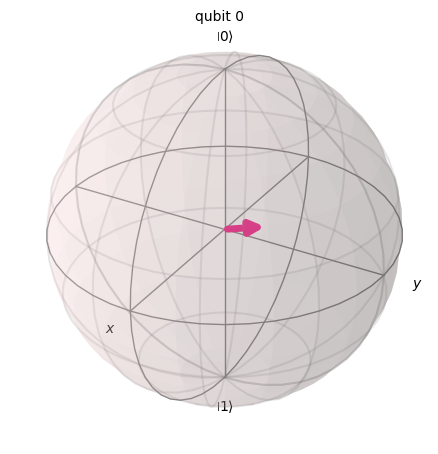

In [6]:
theta = np.pi/3
phi = np.pi/4
alpha = np.cos(theta/2)
beta = np.exp(1j*phi)*np.sin(theta/2)

qc_custom = QuantumCircuit(1)
qc_custom.initialize([alpha, beta], 0)
state_custom = Statevector.from_instruction(qc_custom)
plot_bloch_multivector(state_custom)

### **Bloch Sphere and Quantum Gates**

One of the most important insights is that **quantum gates correspond to rotations on the Bloch sphere**.  
- The Pauli-X gate rotates 180° around the x-axis (flipping |0⟩ and |1⟩).  
- The Pauli-Y and Z gates rotate around the y- and z-axes respectively.  
- The Hadamard gate maps |0⟩ to |+⟩, rotating the state onto the x-axis equator.  

This geometric picture makes it easier to understand quantum computation as controlled rotations of a vector on the sphere.


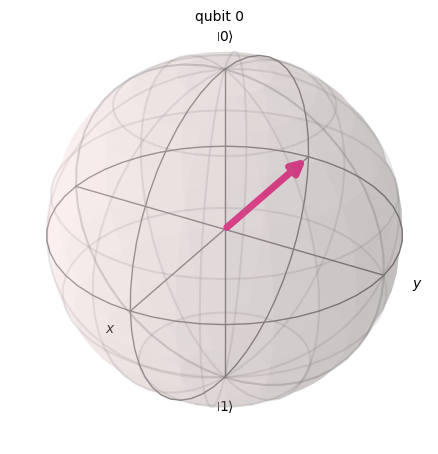

In [7]:
# Start with |0⟩, apply H and Z
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

### **Key Takeaways**

- A **qubit** is a normalized superposition |ψ⟩ = α|0⟩ + β|1⟩, with |α|²+|β|²=1.  
- Global phase is unobservable, so all qubit states map uniquely to points on the **Bloch sphere**.  
- On the sphere: |0⟩ (north), |1⟩ (south), |±⟩ (equator x-axis), |±i⟩ (equator y-axis).  
- The Bloch sphere angles (θ, φ) describe the amplitudes:  
  - θ controls balance between |0⟩ and |1⟩,  
  - φ controls the relative phase.  
- **Quantum gates = rotations** on the Bloch sphere, providing a geometric way to understand their action.  
